## capstone Project

#### About the dataset
* Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting,and training job applicants, and administering employee-benefit programs.


#### Purpose of Performing Operations
* We are supposed to identify how salary is varying with respect to other considerable factors.
* The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.


#### The steps we are going to perform
* importing the required libraries and reading the datasets
* Checking the number of variables that are normally distributed 
* Finding out the correlation between variables using spearman rank correlation 
* Examine the relationship between categorical variables and the dependent variable
* Feature Selection for ML Algorithm
* Apply ML algorithm to the pre-processed columns

## 1) Importing required libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Reading the dataset
df=pd.read_csv("C:/Users/HP/Downloads/HR_O.csv")

In [92]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [93]:
df.tail()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [94]:
# checking shape of the data set
df.shape

(5000, 20)

In [167]:
df.describe()

,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.263600,51.865000,99821.928553,39861.975243,4991.096428,3.667851,2.486784,3.526292,3.512747,4.022756,6.909255,32.18480,2.584800
std,0.440629,8.560691,25376.961744,10469.193447,1268.848087,0.720042,1.711988,0.689243,0.690958,0.595435,1.598747,24.63673,0.520061
min,0.000000,18.000000,5089.000000,0.000000,254.450000,0.364643,0.000000,1.302913,1.294727,2.904165,0.000000,0.00000,0.000000
25%,0.000000,47.000000,83890.338980,33556.135588,4194.516950,3.247560,0.000000,3.090588,3.078176,3.569533,5.935588,8.00000,2.000000
50%,0.000000,52.000000,100579.378500,40231.751415,5028.968925,3.668804,3.179124,3.506758,3.492865,4.255613,7.236375,28.00000,3.000000
75%,1.000000,57.000000,116912.092475,46764.836975,5845.604624,4.072695,3.750092,3.934127,3.920289,4.499254,8.222107,55.00000,3.000000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,6.444943,5.749087,5.748401,5.744388,4.777020,9.069330,72.00000,3.000000


In [95]:
# checking missing values and data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [96]:
# conversion of data-types to float
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors = 'coerce')

In [97]:
# sanity check
df["Total_Sales"].dtype

dtype('float64')

In [98]:
# checking null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

## 2)Checking the number of variables that are normally distributed

In [100]:
num_col = ['Age','Salary','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months']

cat_col = ['Gender','Business','Dependancies','Calls','Type','Billing','Rating','Education']

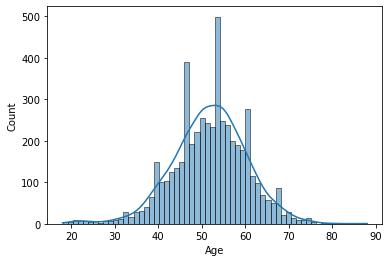

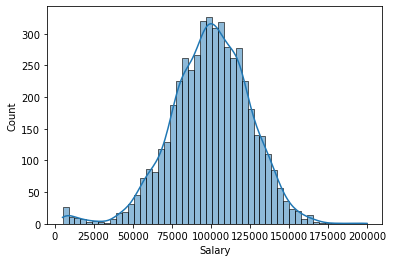

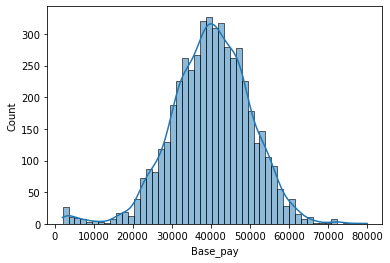

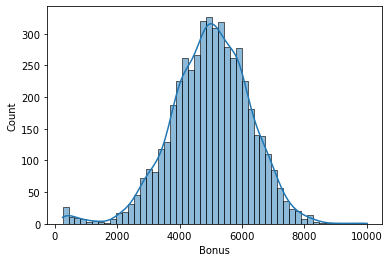

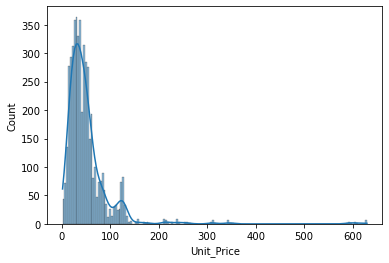

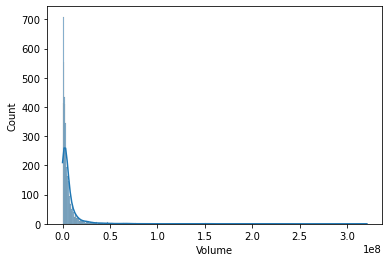

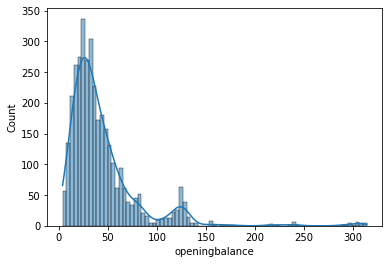

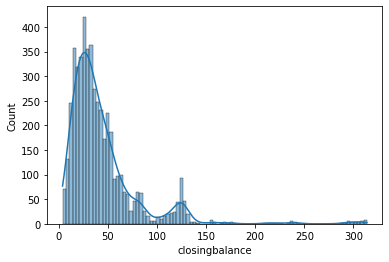

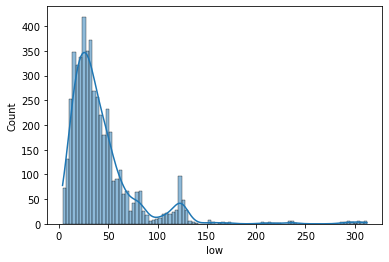

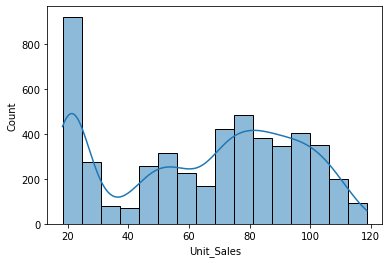

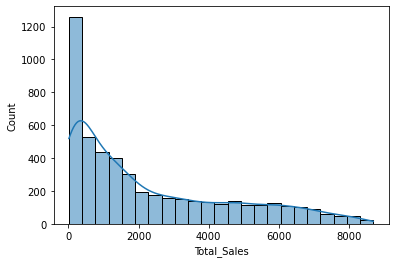

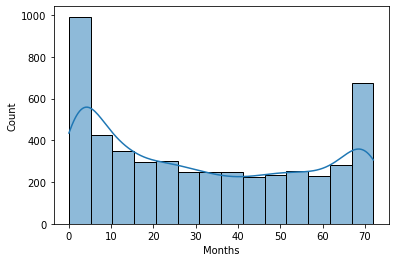

In [101]:
for feature in num_col:
    sns.histplot(df[feature], kde=True)
    plt.show()

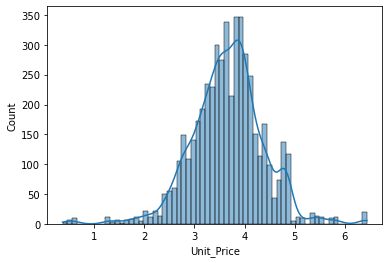

In [102]:
# applying log tranformation on skewed variable

skw_num_var = ['Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months']

#for sanity check, plotting histogram for unit price 
df['Unit_Price']=np.log(df['Unit_Price'])
sns.histplot(df['Unit_Price'], kde=True)
plt.show()


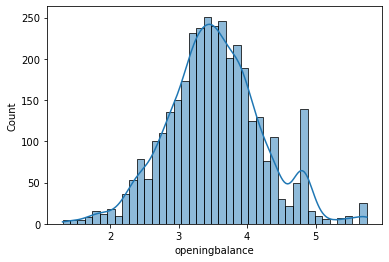

In [103]:
df['openingbalance']=np.log(df['openingbalance'])
sns.histplot(df['openingbalance'], kde=True)
plt.show()

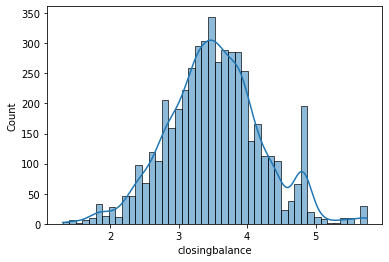

In [104]:
df['closingbalance']=np.log(df['closingbalance'])
sns.histplot(df['closingbalance'], kde=True)
plt.show()

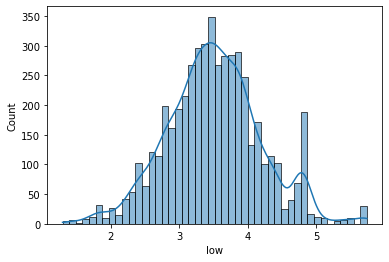

In [105]:
df['low']=np.log(df['low'])
sns.histplot(df['low'], kde=True)
plt.show()

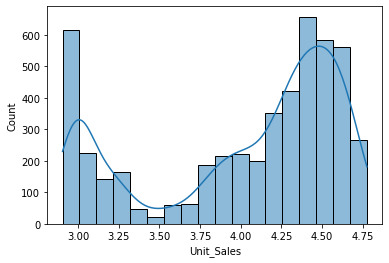

In [106]:
df['Unit_Sales']=np.log(df['Unit_Sales'])
sns.histplot(df['Unit_Sales'], kde=True)
plt.show()

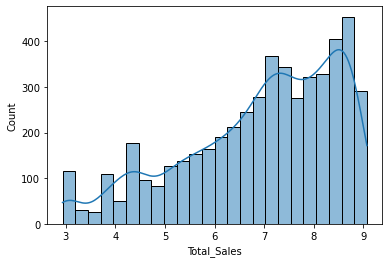

In [107]:
df['Total_Sales']=np.log(df['Total_Sales'])
sns.histplot(df['Total_Sales'], kde=True)
plt.show()

## 3)Finding out the correlation between variables using spearman rank correlation

#### what does spearman's rank relation do, Spearman's rank correlation coefficient measures the degree of similarity between two rankings, and can be used to assess the significance of the relation between them.

In [109]:
corr= df.corr(method='spearman').round(2)

In [110]:
corr

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.00,-0.01,-0.02,-0.02,-0.02,-0.02,-0.00,0.00,-0.01,-0.02,-0.02,-0.02,-0.01
Age,-0.01,1.00,0.20,0.19,0.20,0.13,-0.04,0.07,0.44,0.20,0.20,0.20,0.22
Salary,-0.02,0.20,1.00,1.00,1.00,0.81,-0.39,0.30,0.35,1.00,1.00,1.00,0.60
Base_pay,-0.02,0.19,1.00,1.00,1.00,0.81,-0.39,0.29,0.34,1.00,1.00,1.00,0.60
Bonus,-0.02,0.20,1.00,1.00,1.00,0.81,-0.39,0.30,0.35,1.00,1.00,1.00,0.60
Unit_Price,-0.02,0.13,0.81,0.81,0.81,1.00,-0.32,0.17,0.26,0.81,0.81,0.81,0.55
Volume,-0.00,-0.04,-0.39,-0.39,-0.39,-0.32,1.00,-0.02,-0.15,-0.39,-0.39,-0.39,-0.26
openingbalance,0.00,0.07,0.30,0.29,0.30,0.17,-0.02,1.00,0.29,0.30,0.30,0.30,-0.00
closingbalance,-0.01,0.44,0.35,0.34,0.35,0.26,-0.15,0.29,1.00,0.35,0.35,0.34,0.37
low,-0.02,0.20,1.00,1.00,1.00,0.81,-0.39,0.30,0.35,1.00,1.00,1.00,0.60


Text(0.5, 1.0, " Heatmap using Spearman's correlation")

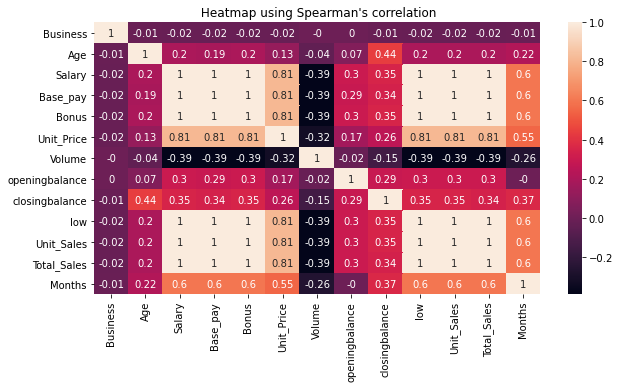

In [111]:
plt.figure(figsize = (10,5))
sns.heatmap(corr,annot =True)
plt.title(" Heatmap using Spearman's correlation")

#### from the above result, we can say that form the spearman  rank correlation, we can say that salary is highly correlated with basepay,unitsales,totalsales and low are highly correlated with salary

## 4)Examining the relationship between categorical variables and the dependent variable

there are "8" categorical variables in our dataset  Gender, Business, Dependancies, Calls, Type, Billing, Rating, Education.

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

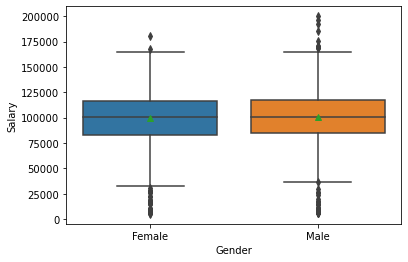

In [113]:
# creating boxplot
sns.boxplot(x='Gender',y='Salary',data=df,showmeans=True)

#### The mean and median value are the same for the male and females

<AxesSubplot:xlabel='Type', ylabel='Salary'>

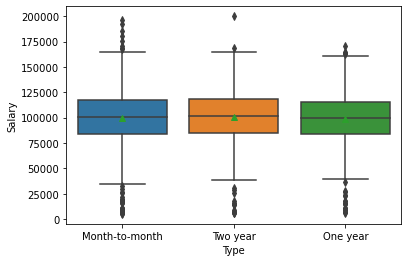

In [114]:
sns.boxplot(x='Type',y='Salary',data=df,showmeans=True)

<AxesSubplot:xlabel='Business', ylabel='Salary'>

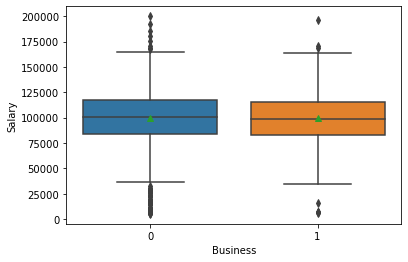

In [115]:
sns.boxplot(x='Business',y='Salary',data=df,showmeans=True)

<AxesSubplot:xlabel='Education', ylabel='Salary'>

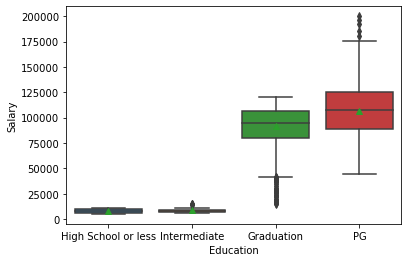

In [116]:
sns.boxplot(x='Education',y='Salary',data=df,showmeans=True)

#### from the above output, Education does affect on salary. those who have done PG get high salary followed by Graduation then intermediate and high school or less

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

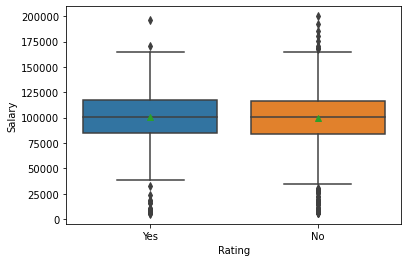

In [117]:
sns.boxplot(x='Rating',y='Salary',data=df,showmeans=True)

####  Here Rating doesn't affect salary

#### converting some variables into Numerical Form

In [121]:
# Gender column
df['Gender'].replace({'Male':0,'Female':1},inplace = True)

In [122]:
df['Dependancies'].replace({'No':0,'Yes':1},inplace = True)

In [123]:
df['Calls'].replace({'No':0,'Yes':1},inplace = True)

In [124]:
df['Type'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace = True)

In [125]:
df['Billing'].replace({'No':0,'Yes':1},inplace = True)

In [126]:
df['Rating'].replace({'No':0,'Yes':1},inplace = True)

In [127]:
df['Education'].replace({'High School or less':0,'Intermediate':1,'Graduation':2,'PG':3},inplace = True)

In [128]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,1,0,0,1,0,0,1,18,5089.00,2035.600,254.4500,1.327075,21226600,1.321756,1.324419,1.294727,2.904165,2.933857,0,0
1,1,0,0,1,0,0,1,19,5698.12,2279.248,284.9060,1.319086,10462800,1.348073,1.302913,1.294727,2.912351,2.936513,0,0
2,0,0,0,1,0,1,0,22,5896.65,2358.660,294.8325,1.358409,18761000,1.442202,1.456287,1.313724,2.928524,2.939162,0,0
3,1,1,0,1,0,1,1,21,6125.12,2450.048,306.2560,1.470176,66130600,1.449269,1.460938,1.342865,2.931194,2.944439,0,0
4,0,0,0,1,0,1,1,23,6245.00,2498.000,312.2500,1.467874,26868200,1.566530,1.483875,1.406097,2.933857,2.947067,1,0


In [129]:
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In [130]:
# filling the NaN values
df['Base_pay'] = df['Base_pay'].replace(np.nan, 0)

In [131]:
df['openingbalance'] = df['openingbalance'].replace(np.nan, 0)

In [132]:
df['Total_Sales'] = df['Total_Sales'].replace(np.nan, 0)

In [133]:
df.isnull().sum().sum()

0

## 5)Feature Selection for ML Algorithm

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(labels=['Salary'], axis=1),df['Salary'],test_size=0.3,random_state=0)

In [137]:
from sklearn.feature_selection import mutual_info_regression
# determining the mutual information
mutual_info = mutual_info_regression(x_train,y_train)

#### what does mutual info regression do ?  ,It give mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [139]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Bonus             6.904258
Base_pay          6.784393
Total_Sales       6.152257
Unit_Sales        5.702624
low               4.306376
Months            4.006215
openingbalance    3.716850
Unit_Price        3.578851
closingbalance    3.418969
Age               3.160779
Education         0.677625
Volume            0.299375
Calls             0.000150
Rating            0.000003
Business          0.000000
Billing           0.000000
Type              0.000000
Dependancies      0.000000
Gender            0.000000
dtype: float64

In [140]:
# Removing the unwanted column
df.drop(['Volume','Calls','Business','Billing','Type','Dependancies','Gender'],axis=1, inplace = True )

In [142]:
# sanity check
df.head(1)

,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,1,18,5089.0,2035.6,254.45,1.327075,1.321756,1.324419,1.294727,2.904165,2.933857,0,0


In [143]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          5000 non-null   int64  
 1   Age             5000 non-null   int64  
 2   Salary          5000 non-null   float64
 3   Base_pay        5000 non-null   float64
 4   Bonus           5000 non-null   float64
 5   Unit_Price      5000 non-null   float64
 6   openingbalance  5000 non-null   float64
 7   closingbalance  5000 non-null   float64
 8   low             5000 non-null   float64
 9   Unit_Sales      5000 non-null   float64
 10  Total_Sales     5000 non-null   float64
 11  Months          5000 non-null   int64  
 12  Education       5000 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 507.9 KB


## 6) Applying ML algorithm to the pre-processed columns

In [146]:
# splitting thr data into dependent and independent variables
x=df.drop('Salary', axis =1) # independent variable
y=df['Salary'] #dependent variable

In [147]:
# importing train test split
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# it mean 30% record goes to test set and rest goes to train set

#### 1) Linear Regression

In [151]:
from sklearn import linear_model, metrics
LR = linear_model.LinearRegression()
LR.fit(x_train,y_train)  # fitting train data to linear regression model

LinearRegression()

In [153]:
y_pred = LR.predict(x_test)  # predicting y values based on x_test

In [155]:
# Evaluation of Linear Regression model based on mean square error, root mse , mae and r square values
from sklearn.metrics import mean_squared_error, explained_variance_score,mean_absolute_error
mse = mean_squared_error ( y_test, y_pred)
print(' Mean Squared Error : {}'.format(mse))

rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : {}'.format(rmse))

mae = mean_absolute_error ( y_test, y_pred)
print('Mean absolute Error : {}'.format(mae))

r_square = metrics.r2_score (y_test,y_pred)
print ('R square error associated with linear regression is :', r_square)

 Mean Squared Error : 1.2880712161276019e-11
Root Mean Squared Error : 3.5889709056045605e-06
Mean absolute Error : 2.6945652146726693e-06
R square error associated with linear regression is : 1.0


#### 2) decision Tree Algorithm

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(x_train,y_train)  # fitting train data to Decision Tree regressor model
y_pred = DTR.predict (x_test)

In [159]:
# Evaluation of Decision Tree Regression model based on mean square error, root mse , mae and r square values
DT_mse = mean_squared_error ( y_test, y_pred)
print(' Mean Squared Error : {}'.format(DT_mse))

DT_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : {}'.format(DT_rmse))

DT_mae = mean_absolute_error ( y_test, y_pred)
print('Mean absolute Error : {}'.format(DT_mae))

DT_r_square = metrics.r2_score (y_test,y_pred)
print ('R square error associated with linear regression is :', DT_r_square)

 Mean Squared Error : 49990.34983298267
Root Mean Squared Error : 223.58521827925625
Mean absolute Error : 49.72560819333332
R square error associated with linear regression is : 0.999919707269245


#### 3) Random Forest 

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
RFM = RandomForestRegressor(random_state = 0)
RFM.fit(x_train,y_train)    # fitting train data to linear regression model
y_pred = RFM.predict (x_test)

In [165]:
# Evaluation of Random Forest Regression model based on mean square error, root mse , mae and r square values
RFM_mse = mean_squared_error ( y_test, y_pred)
print(' Mean Squared Error : {}'.format(RFM_mse))

RFM_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : {}'.format(RFM_rmse))

RFM_mae = mean_absolute_error ( y_test, y_pred)
print('Mean absolute Error : {}'.format(RFM_mae))

RFM_r_square = metrics.r2_score (y_test,y_pred)
print ('R square error associated with linear regression is :', RFM_r_square)

 Mean Squared Error : 12532.4746829107
Root Mean Squared Error : 111.94853586765082
Mean absolute Error : 29.83563848848718
R square error associated with linear regression is : 0.9999798707826856


### Summary
* we fill NAN values by replace function
* we compare Gender vs Salary , we got to know that Males and Females doesn't affect salary
* those who have Business and those who dont are equal numbers on the basis of salaries in Business vs salary graph
* those who have done PG having more salary followed by Graduation, Intermediate and High School or less in Education vs Salary
* Age,Salary,unitsales,basepay,months are normally distributed
* form the spearman  rank correlation, we can say that salary is highly correlated with basepay,unitsales,totalsales and low
* we apply Machine Learning Algorithm like Linear Regression, Decision Tree and random forest

### conclusion
* we perform Linear Regression, Decision Tree and Random Forest and all the model evaluation is near to 1 which means the prediction fits the data
* I choose Decision Tree model because beacause it shows the best fit for my algorithm